## **Task 5: Personal Loan Acceptance Prediction**

## **Introduction and Problem Statement**

This task is part of the Data Science & Analytics Internship at DevelopersHub Corporation, due August 2, 2025. The objective is to predict which customers are likely to accept a personal loan offer using the Bank Marketing Dataset. We will explore features like `age`, `job`, and `marital status`, train a Logistic Regression model, and analyze which customer groups are most likely to accept the offer to derive business insights.

## **Dataset Understanding and Description**

The Bank Marketing Dataset contains data on ~41,188 bank customers from a marketing campaign, with 21 columns:

### **Numerical Features:**
- `age`
- `duration` (call duration)
- `campaign` (number of contacts)
- `pdays` (days since last contact)
- `previous` (previous contacts)
- `emp.var.rate` (employment variation rate)
- `cons.price.idx` (consumer price index)
- `cons.conf.idx` (consumer confidence index)
- `euribor3m` (3-month Euribor rate)
- `nr.employed` (number of employees)

### **Categorical Features:**
- `job` (e.g., admin, technician)
- `marital` (e.g., married, single)
- `education`
- `default` (credit default)
- `housing` (housing loan)
- `loan` (personal loan)
- `contact` (cellular/telephone)
- `month`
- `day_of_week`
- `poutcome` (previous campaign outcome)

### **Target:**
- `y` (yes/no, whether the customer accepted the loan offer)

**Source:** UCI Machine Learning Repository (`bank-additional-full.csv`)

**Note:** The dataset may contain “unknown” values, which will be treated as missing data.


## **Data Cleaning and Preparation**

We will load the dataset, handle missing values (e.g., “unknown” entries), drop irrelevant columns if necessary, and encode categorical features using One-Hot Encoding.

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
# Display dataset structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())


Dataset Shape: (41188, 21)

Column Names: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

First 5 Rows:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1 

In [4]:
# Check for missing values (including 'unknown')
print("\nMissing Values (including 'unknown'):\n", df.isin(['unknown']).sum())




Missing Values (including 'unknown'):
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [5]:

# Replace 'unknown' with NaN and drop rows with missing values
df = df.replace('unknown', pd.NA)
df = df.dropna()

In [6]:
# Check for missing values after cleaning
print("\nMissing Values after cleaning (including 'unknown'):\n", df.isin(['unknown']).sum())



Missing Values after cleaning (including 'unknown'):
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), 
                           columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)

In [8]:
# Verify cleaned dataset
print("\nCleaned Dataset Shape:", df.shape)
print("\nCleaned Column Names:", df.columns.tolist())


Cleaned Dataset Shape: (39408, 48)

Cleaned Column Names: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


## **Exploratory Data Analysis (EDA)**

- We will explore features like age, job, and marital status to identify patterns in loan acceptance:
- Bar plot of loan acceptance by job.
- Histogram of age by loan acceptance.
- Bar plot of loan acceptance by marital status.

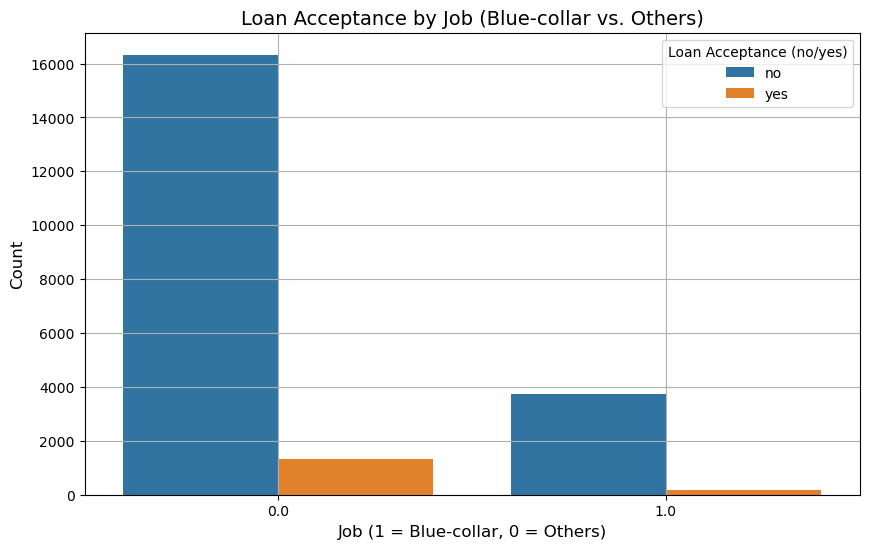

In [9]:
# Bar Plot: Loan acceptance by job
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_blue-collar', hue='y')
plt.title('Loan Acceptance by Job (Blue-collar vs. Others)', fontsize=14)
plt.xlabel('Job (1 = Blue-collar, 0 = Others)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Acceptance (no/yes)')
plt.grid(True)
plt.show()


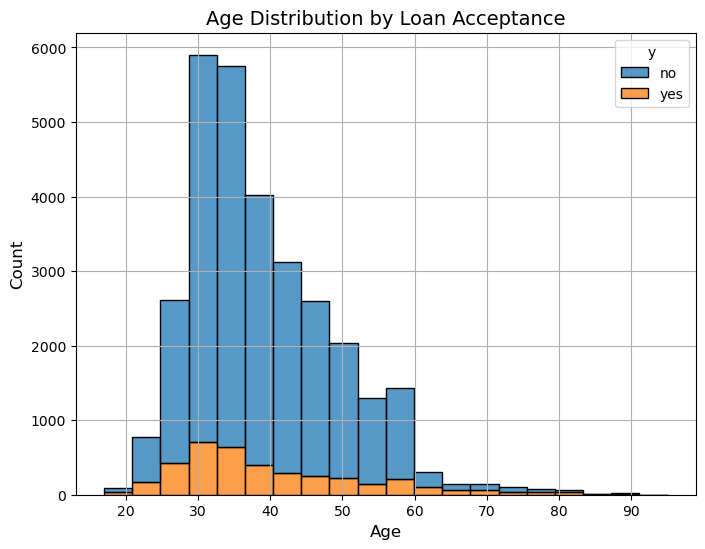

In [10]:
# Histogram: Age distribution by loan acceptance
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=20)
plt.title('Age Distribution by Loan Acceptance', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()



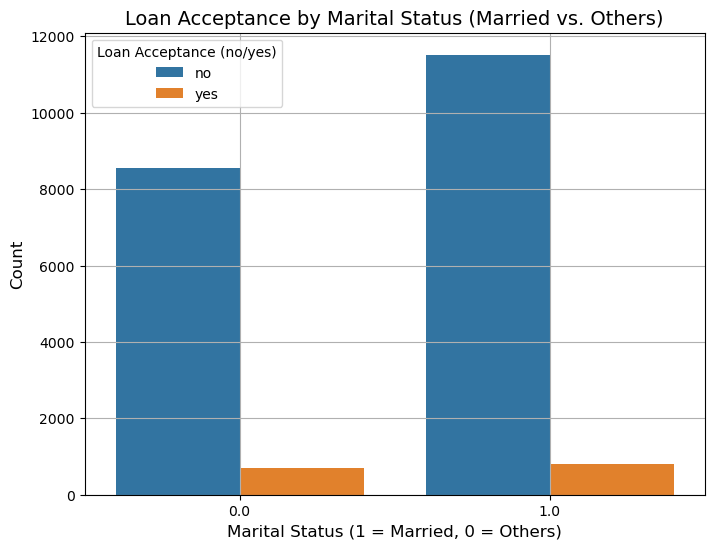

In [11]:
# Bar Plot: Loan acceptance by marital status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital_married', hue='y')
plt.title('Loan Acceptance by Marital Status (Married vs. Others)', fontsize=14)
plt.xlabel('Marital Status (1 = Married, 0 = Others)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Acceptance (no/yes)')
plt.grid(True)
plt.show()



## **Model Training and Testing**

We will train a Logistic Regression model to predict loan acceptance and split the data into 80% training and 20% testing.

In [12]:
# Prepare features and target
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})



In [13]:

# Handle missing values in y with mode
y.fillna(y.mode()[0], inplace=True)




In [14]:
# Handle missing values in X with median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)



In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [17]:

# Train logistic regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## **Evaluation Metrics**

We will evaluate the model using accuracy and a confusion matrix.

In [18]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9245115452930728


In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)




Confusion Matrix:
 [[6954  178]
 [ 417  333]]


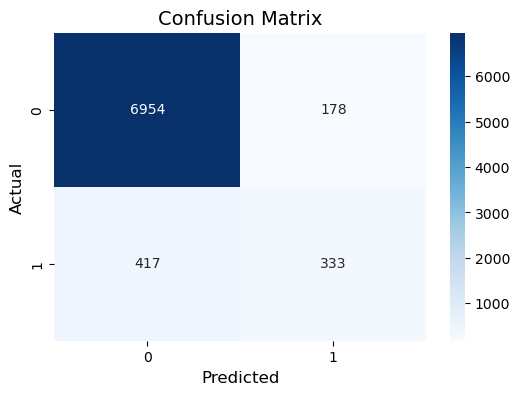

In [20]:

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

## **Feature Importance**

We will analyze the model’s coefficients to identify which customer groups are more likely to accept the loan offer.

In [21]:
# Feature Importance
# Get feature coefficients from the trained Logistic Regression model
coefficients = model.coef_[0]
feature_names = X.columns



In [22]:
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})



In [23]:
# Sort by absolute coefficient to identify the most influential features
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)



In [24]:
# Display the top 10 features
print("\nTop 10 Features Influencing Loan Acceptance:")
print(feature_importance[['Feature', 'Coefficient']].head(10))




Top 10 Features Influencing Loan Acceptance:
              Feature  Coefficient
5        emp.var.rate    -1.649908
1            duration     1.105884
6      cons.price.idx     0.995175
7       cons.conf.idx     0.415090
34          month_jul    -0.411911
9         nr.employed     0.401000
8           euribor3m    -0.387907
31  contact_telephone    -0.366871
3               pdays    -0.309292
40          month_sep     0.215749


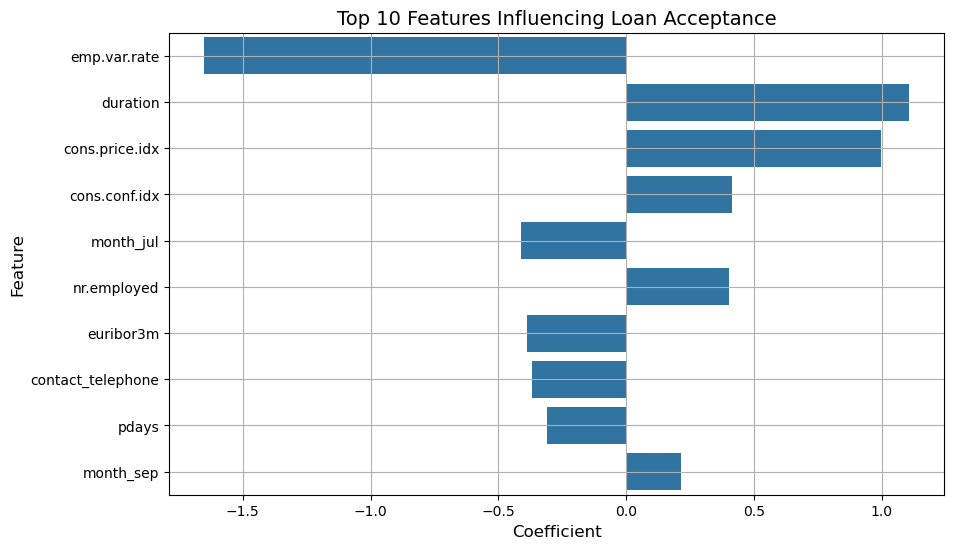

In [25]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 Features Influencing Loan Acceptance', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()